# Timeseries of salinity and temperature contributions to stratification and restratification

In [1]:
import scipy.io as sio
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cmocean.cm as cmo
import seaborn as sns
from scipy import signal
from scipy.stats import pearsonr
sns.set_style('darkgrid')
from info import datadir, figdir

import warnings
warnings.filterwarnings('ignore')

### Loading data

In [2]:
# Stratification
data = pd.read_csv(datadir+'monthly_timeseries.csv',index_col=0)
dates = pd.to_datetime(data['dates'])

SI_all_upper = data['SI_all_upper']
SI_all_lower = data['SI_all_lower']
SI_all_total = data['SI_all_total']

SI_S_upper = data['SI_S_upper']
SI_S_lower = data['SI_S_lower']
SI_S_total = data['SI_S_total']

SI_T_upper = data['SI_T_upper']
SI_T_lower = data['SI_T_lower']
SI_T_total = data['SI_T_total']


# Restratification
data = pd.read_csv(datadir+'annual_timeseries.csv',index_col=0)

conv = data['conv']

restrat_all_upper = data['restrat_all_upper']
restrat_all_lower = data['restrat_all_lower']
restrat_all_total = data['restrat_all_total']

restrat_S_upper = data['restrat_S_upper']
restrat_S_lower = data['restrat_S_lower']
restrat_S_total = data['restrat_S_total']

restrat_T_upper = data['restrat_T_upper']
restrat_T_lower = data['restrat_T_lower']
restrat_T_total = data['restrat_T_total']

### Plotting functions

In [3]:
def plotStrat(ax,strat,color,contrib='Total',legend=None):
    time = range(len(dates))
    ax.tick_params(axis='y', labelsize=11)
    if contrib=='Total':
        ax.set_ylabel('Stratification Index (kg/m$^2$)', fontsize=13)
        loc = 'upper left'
    else:
        ax.set_ylabel('Stratification Index (m)', fontsize=13)
        loc = 'upper right'
    if legend==None:
        ax.plot(time,strat,color=color)
    else:
        ax.plot(time,strat,color=color,label=legend)
        ax.legend(fontsize=13,loc=loc)
    ax.set_xlim(time[0],time[-1])
    step = 12
    ax.set_xticks(time[0::step])
    ax.set_xticklabels([dates[i].year for i in np.arange(0,len(time[0::step])*step,step)],fontsize=10)
    

def plotRestratification(ax,restrat,color,contrib='Total',start=0,legend=None):
    time = range(len(dates))
    ax.plot(time[start::12],restrat,color=color,label=legend)
    if contrib=='Total':
        ax.set_ylabel('Difference max-min SI (kg/m$^2$)', fontsize=12)
        loc = 'upper left'
    else:
        ax.set_ylabel('Difference max-min SI (m)', fontsize=12)
        loc = 'upper right'
    if legend!=None:
        ax.legend(fontsize=13,loc=loc)
    ax.scatter(time[start::12],restrat,color=color)
    ax.set_xlim(time[0]-2,time[-1]-5)
    ax.set_xticks(time[start::12])
    ax.set_xticklabels([dates[i].year for i in np.arange(0,len(time[0::12])*12,12)],fontsize=11)
    #ax.set_ylabel('Difference max-min SI (kg/m$^2$)',fontsize=12)
    ax.tick_params(axis='y',labelsize=11)
    return restrat

## Contributions of salt and temperature per layer

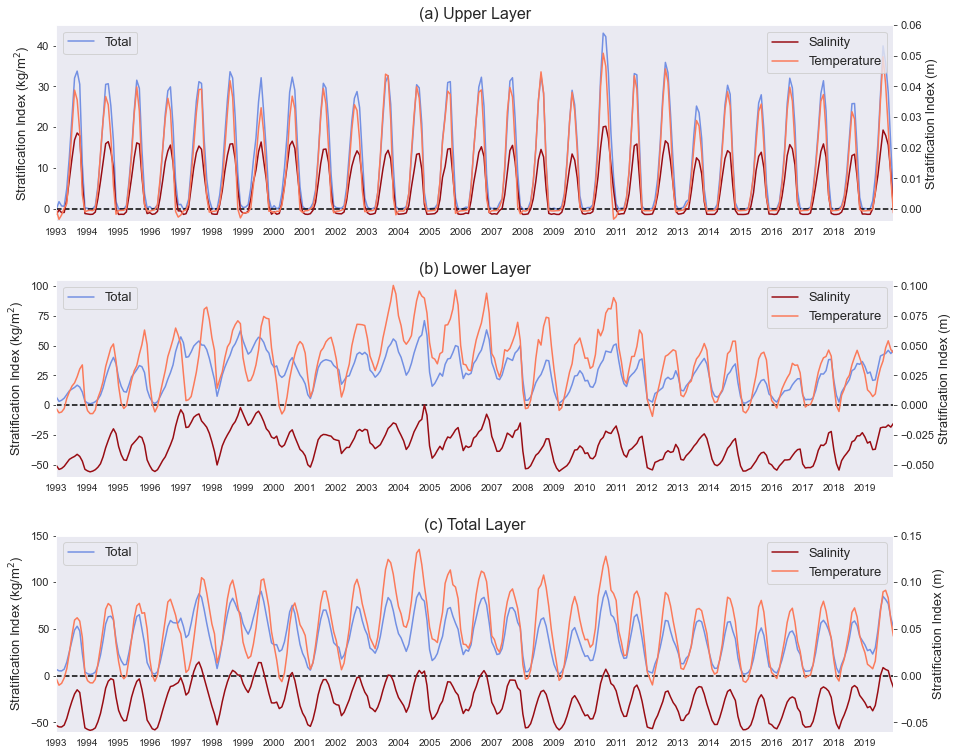

In [4]:
sns.set_style('dark')
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(15,13))

cmap = matplotlib.cm.get_cmap('cmo.dense')
c_sigma = cmap(0.4)
cmap_S = matplotlib.cm.get_cmap('cmo.haline')
c_S = cmap_S(0.6)
cmap_T = matplotlib.cm.get_cmap('cmo.thermal')
c_T = cmap_T(0.8)

cmap = matplotlib.cm.get_cmap('Reds')
c_S = cmap(0.9)
c_T = cmap(0.45)

ax11 = ax1.twinx()
plotStrat(ax11,SI_S_upper,c_S,contrib='S',legend='Salinity')
plotStrat(ax11,SI_T_upper,c_T,contrib='S',legend='Temperature')
plotStrat(ax1,SI_all_upper,c_sigma,legend='Total')
ax1.set_ylim(-3,45)
ax11.set_ylim(-0.004,0.06)
ax1.set_title('(a) Upper Layer',fontsize=16)
ax1.plot(range(len(dates)),np.zeros(len(dates)),color='black',linestyle='dashed')

ax22 = ax2.twinx()
plotStrat(ax22,SI_S_lower,c_S,contrib='S',legend='Salinity')
plotStrat(ax22,SI_T_lower,c_T,contrib='S',legend='Temperature')
plotStrat(ax2,SI_all_lower,c_sigma,legend='Total')
ax2.set_title('(b) Lower Layer',fontsize=16)
ax2.set_ylim(-60,105)
ax22.set_ylim(-0.06,0.105)
ax2.plot(range(len(dates)),np.zeros(len(dates)),color='black',linestyle='dashed')

ax33 = ax3.twinx()
plotStrat(ax33,SI_S_total,c_S,contrib='S',legend='Salinity')
plotStrat(ax33,SI_T_total,c_T,contrib='S',legend='Temperature')
plotStrat(ax3,SI_all_total,c_sigma,legend='Total')
ax3.set_title('(c) Total Layer',fontsize=16)
ax3.set_ylim(-60,150)
ax33.set_ylim(-0.06,0.15)
ax3.plot(range(len(dates)),np.zeros(len(dates)),color='black',linestyle='dashed')

plt.subplots_adjust(hspace=0.3)
plt.savefig(figdir+'strat_salt_temp.pdf',bbox_inches='tight')
plt.show()

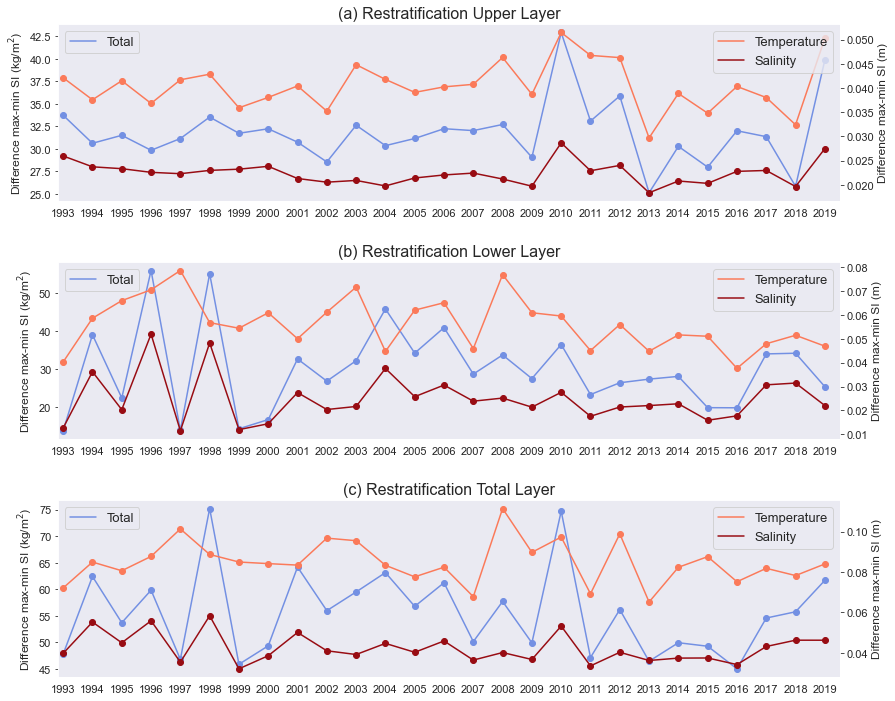

In [5]:
sns.set_style('dark')
fig, (ax2,ax3,ax4) = plt.subplots(3,1,figsize=(14,12))

cmap = matplotlib.cm.get_cmap('cmo.dense')

# UPPER LAYER SI
ax22 = ax2.twinx()
plotRestratification(ax2,restrat_all_upper,c_sigma,legend='Total')
plotRestratification(ax22,restrat_T_upper,c_T,contrib='S',legend='Temperature')
plotRestratification(ax22,restrat_S_upper,c_S,contrib='S',legend='Salinity')
ax2.set_title('(a) Restratification Upper Layer', fontsize=16)

# LOWER LAYER SI
ax33 = ax3.twinx()
plotRestratification(ax3,restrat_all_lower,c_sigma,legend='Total')
plotRestratification(ax33,restrat_T_lower,c_T,contrib='S',legend='Temperature')
plotRestratification(ax33,restrat_S_lower,c_S,contrib='S',legend='Salinity')
ax3.set_title('(b) Restratification Lower Layer', fontsize=16)

# TOTAL SI
ax44 = ax4.twinx()
plotRestratification(ax4,restrat_all_total,c_sigma,legend='Total')
plotRestratification(ax44,restrat_T_total,c_T,contrib='S',legend='Temperature')
plotRestratification(ax44,restrat_S_total,c_S,contrib='S',legend='Salinity')
ax4.set_title('(c) Restratification Total Layer', fontsize=16)

plt.subplots_adjust(hspace=0.35)
plt.savefig(figdir+'restrat_salt_temp.pdf',bbox_inches='tight')
plt.show()